In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('economic_index.csv')

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df.corr()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
Unnamed: 0,1.000000,-8.667781e-01,-4.986939e-01,-0.934555,0.935300,-0.988246
year,-0.866778,1.000000e+00,7.884865e-14,0.882851,-0.877000,0.863232
month,-0.498694,7.884865e-14,1.000000e+00,0.339526,-0.351189,0.481287
interest_rate,-0.934555,8.828507e-01,3.395257e-01,1.000000,-0.925814,0.935793
unemployment_rate,0.935300,-8.769997e-01,-3.511891e-01,-0.925814,1.000000,-0.922338
index_price,-0.988246,8.632321e-01,4.812873e-01,0.935793,-0.922338,1.000000


In [5]:
df.shape

(24, 6)

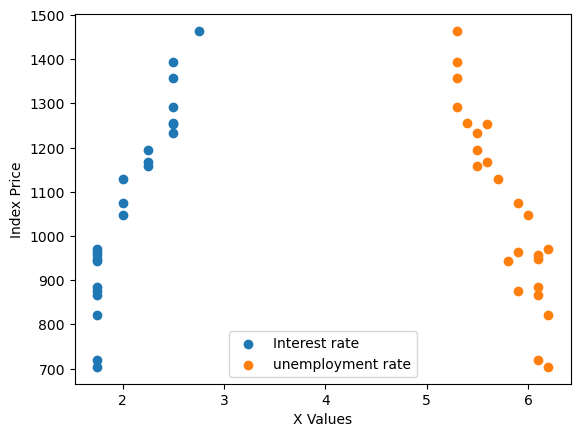

In [6]:
plt.scatter(df['interest_rate'],df['index_price'],label='Interest rate')
plt.scatter(df['unemployment_rate'],df['index_price'],label='unemployment rate')
plt.xlabel("X Values")
plt.ylabel("Index Price")
plt.legend()
plt.show()

In [7]:
#drop unncessary col
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)



In [9]:
df.head(2)

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394


In [14]:
df.isnull().sum() #check null values


interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

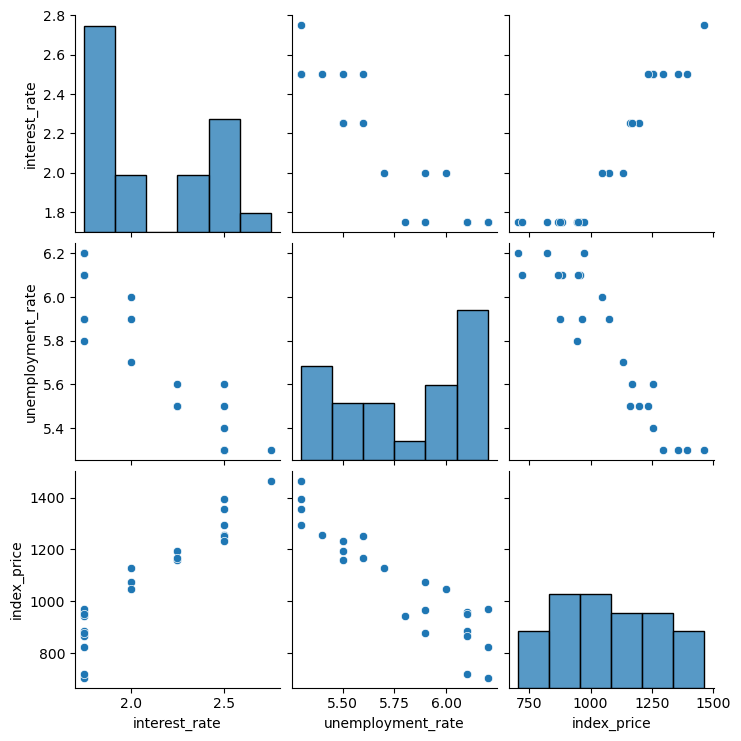

In [ ]:
#visualization
import seaborn as sns
sns.pairplot(df)



In [16]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


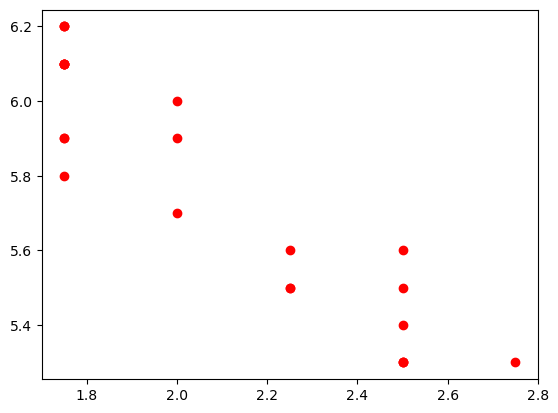

In [17]:
#visualize the data points more closely

plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')

In [21]:
## independent and dependent featuress

X=df[['interest_rate','unemployment_rate']]
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [23]:
#other method 
X=df.iloc[:,:-1]
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [27]:
y=df.iloc[:,-1]
y.head()
print(type(y))

<class 'pandas.core.series.Series'>


In [ ]:
#train test split 
from sklearn.model_selection import train_test_split
X_train,X_test , y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

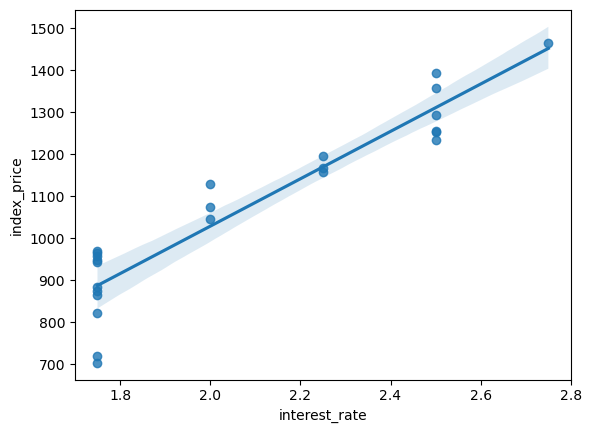

In [31]:

sns.regplot(x=df['interest_rate'], y=df['index_price'])
plt.show()

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

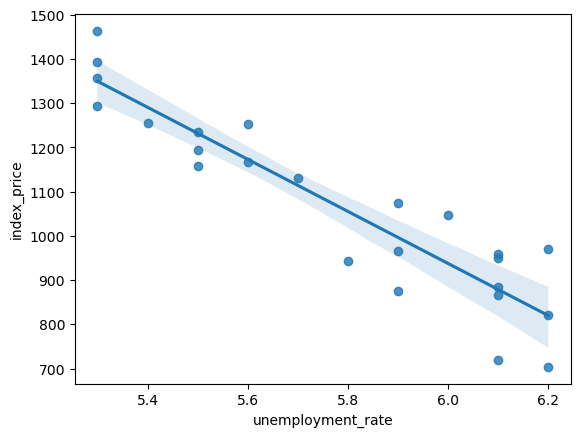

In [32]:
sns.regplot(x=df['unemployment_rate'],y=df['index_price'])

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
X_train = scaler.fit_transform(X_train)

In [36]:
X_test = scaler.transform(X_test)

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [38]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#cross validation 

from sklearn.model_selection import cross_val_score

validation_score = cross_val_score(model, X_train, y_train ,scoring='neg_mean_squared_error',cv=3)

In [51]:
np.mean(validation_score)

-5914.828180162388

In [52]:
#prediction 
y_pred = model.predict(X_test)

In [ ]:
scaler.transform(y_pred)

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [59]:
mse = mean_squared_error(y_test,y_pred)
mse

5793.762887712579

In [60]:
mae = mean_absolute_error(y_test,y_pred)
mae

59.935781523235526

In [61]:
rmse = np.sqrt(mse)
rmse

76.11677139574812

In [62]:
from sklearn.metrics import r2_score

In [63]:
score = r2_score(y_test,y_pred)
score

0.8278978091457142

In [64]:
from sklearn.metrics import r2_score

# Normal R2
r2 = r2_score(y_test, y_pred)

# Adjusted R2
n = X_test.shape[0]   # number of samples
p = X_test.shape[1]   # number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("R2 Score:", r2)
print("Adjusted R2 Score:", adj_r2)


R2 Score: 0.8278978091457142
Adjusted R2 Score: 0.713163015242857


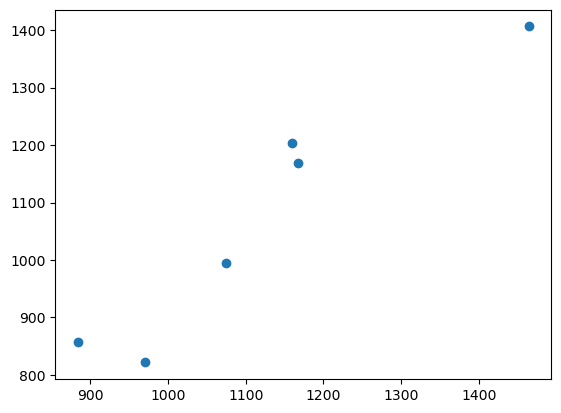

In [65]:
plt.scatter(y_test,y_pred)

In [66]:
residuals = y_test - y_pred
residuals

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

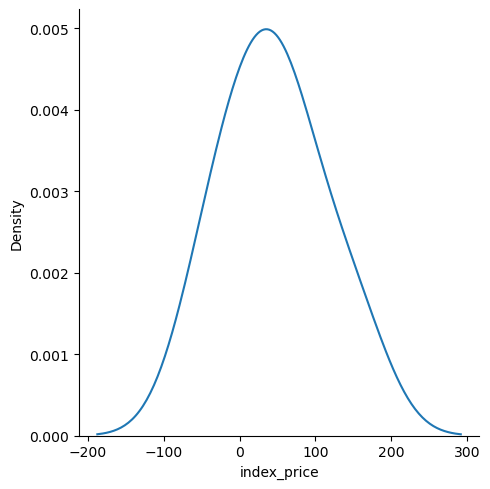

In [68]:
#plot the residuals 
sns.displot(residuals,kind='kde')

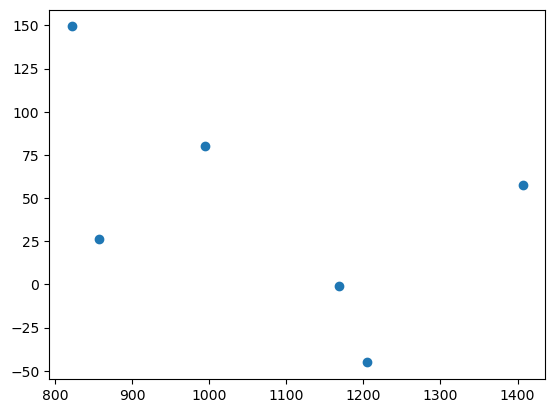

In [69]:
#scatter plot with respect to predictions and residuals 
plt.scatter(y_pred,residuals)

In [70]:
#ols linear regression 
import statsmodels.api as sm 
model2 = sm.OLS(y_train,X_train).fit()

In [71]:
model2.summary()

c:\Users\user\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 22 Aug 2025   Prob (F-statistic):                       0.754
Time:                        15:57:44   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
model.coef_

array([  88.27275507, -116.25716066])